# Andre's Code

In [1]:
from __future__ import division
import numpy as np
from numpy.random import rand
import math
from random import randint
import itertools
import random
import copy
from copy import deepcopy 
from multiprocessing import Pool
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ken's break ties function.
def argmax_breaking_ties_randomly(x):
    max_value = np.max(x)
    indices_with_max_value = np.flatnonzero(x == max_value)
    return np.random.choice(indices_with_max_value)

## Simulator

In [3]:
class ConnectN:
    """
    Connect N game simulator for two players, 1 and -1.
    
    Inputs:
    Grid size- creates a grid size x grid size square board
    N- number of tokens a player must connect to win the game
    
    """
    
    def __init__(self, grid_size, n):
        self.n = n
        self.grid_size = grid_size
        self.grid = np.zeros([grid_size,grid_size])
        self.finished = 0
        self.turn_num = 0
        
    def reset(self):
        self.__init__(self.grid_size, self.n)

    def check_win(self, col, row, player):
        """
        Checks if given player has connected N tokens.
        """
        for i in range(0, self.n):
            if sum(self.grid[col, row - i:row - i + self.n]) == self.n*player:
                self.finished = 1
                return 1
            if sum(self.grid[col - i: col - i + self.n, row]) == self.n*player:
                self.finished = 1
                return 1
            if col - i >= 0 and col - i + self.n - 1 < self.grid_size and row - i >= 0 and row - i + self.n - 1 < self.grid_size:
                if sum([self.grid[col - i + x, row - i + x] for x in range(0, self.n)]) == self.n*player:
                    self.finished = 1
                    return 1
            if col - i >= 0 and col - i + self.n - 1 < self.grid_size and row + i >= self.n - 1 and row + i < self.grid_size:
                if sum([self.grid[col - i + x, row + i - x] for x in range(0, self.n)]) == self.n*player:
                    self.finished = 1
                    return 1
        return 0

    def move(self, col, player):
        """
        Given player and column to move in, modifies board and increments the turn counter.
        
        Returns a tuple, where first value is return message and second value is reward.
        """
        self.turn_num += 1
        
        if self.finished == 1:
            return 1, 50
        sum_col = np.sum([abs(x) for x in self.grid[col]])
        if sum_col == self.grid_size:
            return -1, -1
        self.grid[col, sum_col] = player
        if self.check_win(col, sum_col, player) == 1:
            return 1, 50
        return 0, 0
    
    def turn(self):
        """
        Returns which player's turn it is. First turn is player 1, second turn is player -1.
        """
        if self.turn_num%2 == 0:
            return 1
        else:
            return -1
        
    def next_possible_moves(self):
        """
        Returns array of possible columns for a next move
        """
        columns = []
        
        for i in xrange(0, self.grid_size):
            if (0 in self.grid[i]):
                columns.append(i)
                
        return columns
    
    def all_tokens_placed(self):
        """
        Returns location of all tokens (column, row) that have been placed
        """
        all_tokens = []
        
        for col in xrange(0, self.grid_size):
            for row in xrange(0, self.grid_size): 
                if self.grid[col][row] != 0:
                    all_tokens.append({"location": [col, row], "player": self.grid[col][row]})
                    
        return all_tokens
    
    def is_empty(self, col, row):
        """
        Returns if a given spot (column, row) is empty
        """
        return self.grid[col][row] == 0
    
    """
    Following streak functions check if player has token streak in the four possible win directions
    """
    def streakVertical(self, board, col, row, player):
        if row > len(board[col]) - self.n:
            return 0
        for i in range(0,self.n):
            if board[col][row + i] == -1*player:
                return 0
            if board[col][row + i] == 0:
                return i
        return self.n

    def streakHorizontal(self, board, col, row, player):
        if col > len(board) - self.n:
            return 0
        for i in range(0,self.n):
            if board[col + i][row] == -1*player:
                return 0
            if board[col + i][row] == 0:
                return i
        return self.n
    
    def streakDiagonalUp(self, board, col, row, player):
        if row > len(board[col]) - self.n or col > len(board) - self.n:
            return 0
        for i in range(0,self.n):
            if board[col + i][row + i] == -1*player:
                return 0
            if board[col + i][row + i] == 0:
                return i
        return self.n
    
    def streakDiagonalDown(self, board, col, row, player):
        if row < self.n or col > len(board) - self.n:
            return 0
        for i in range(0,self.n):
            if board[col + i][row - i] == -1*player:
                return 0
            if board[col + i][row - i] == 0:
                return i
        return self.n
    
    def print_grid(self):
        print(np.rot90(self.grid))

## Play Game

In [31]:
'''
MODIFIED TO (NOT PRINT) AND (RETURN INDICATOR OF WINNER) 
'''
def play_game_mod(board, p1, p2, q=False):
    """
    Runs Connect 4 game given simulator object and two agents (players)
    q takes False, -1, 1 (integer indicating which player is Q-Learner)
    Returns player number who has won
    """
    reward = None
    
    if q == 1:
        while True:
            #print("p1")
            p1move = p1.interact(reward, board)
            #print(p1move)
            if (p1move is None):
                board.print_grid()
                print("error player 1 a")
                return -1, 0
            p1result, reward = board.move(p1move, 1)
            #print p1result
            if (p1result == 1):
                #print("player 1")
                #board.print_grid()
                return 1, 1
            elif (p1result == -1):
                board.print_grid()
                print("error player 1 b")
                return -1, 0
            #print("p2")
            p2move = p2.calc_next_move()
            #print(p2move)
            if (p2move is None):
                board.print_grid()
                print("error player 2")
                return -1, 0 
            p2result = board.move(p2move, -1)
            #print p2result
            if (p2result[0] == 1):
                #print("player 2")
                #board.print_grid()
                return 1, -1
            elif (p2result[0] == -1):
                board.print_grid()
                print("error player 2")
                return -1, 0
    elif q == -1:
        while True:
            #print("p1")
            p1move = p1.calc_next_move()
            #print(p1move)
            if (p1move is None):
                board.print_grid()
                print("error player 1 a")
                return -1, 0
            p1result, reward = board.move(p1move, 1)
            #print p1result
            if (p1result == 1):
                #print("player 1")
                #board.print_grid()
                return 1, 1
            elif (p1result == -1):
                board.print_grid()
                print("error player 1 b")
                return -1, 0
            #print("p2")
            p2move = p2.interact(reward, board)
            #print(p2move)
            if (p2move is None):
                board.print_grid()
                print("error player 2")
                return -1, 0 
            p2result = board.move(p2move, -1)
            #print p2result
            if (p2result[0] == 1):
                #print("player 2")
                #board.print_grid()
                return 1, -1
            elif (p2result[0] == -1):
                board.print_grid()
                print("error player 2")
                return -1, 0
    
    else:
        while True:
            #print("p1")
            p1move = p1.calc_next_move()
            #print(p1move, board.next_possible_moves())
            #print(p1move)
            if (p1move is None):
                board.print_grid()
                print("error 1")
                return -1, 0
            p1result = board.move(p1move, 1)
            #print p1result
            if (p1result[0] == 1):
                #print("player 1")
                #board.print_grid()
                return 1, 1
            elif (p1result[0] == -1):
                board.print_grid()
                print("error 2")
                return -1, 0
            #print("p2")
            p2move = p2.calc_next_move()
            #print(p2move, board.next_possible_moves())
            #print(p2move)
            if (p2move is None):
                board.print_grid()
                print("error 3")
                return -1, 0
            p2result = board.move(p2move, -1)
            #print p2result
            if (p2result[0] == 1):
                #print("player 2")
                #board.print_grid()
                return 1, -1
            elif (p2result[0] == -1):
                board.print_grid()
                print("error 4")
                return -1, 0

## Agents

### Minimax

In [5]:
# Minimax with depth past 6 takes a long time to make a move, seems not necessary
# Minimax depth 5 is "hard"
# Minimax depth 3 is "medium"
# Minimax depth 1 is "easy"

class Minimax_Learner(object):
    """
    Implementation of AI algorithm Minimax with static evaluator 
    
    Inputs:
    Connect N board
    Depth- Minimax Learner will build tree of next possible moves to that depth
    N- number of tokens that need to be connected for a player to win
    Player- player number, either 1 or -1
    Algorithm- either "minimax" or "ab" for alpha beta pruned minimax
    """
    
    def __init__(self, board, depth, n, player, alg):
        self.board = board
        self.depth = depth
        self.num_states = board.grid_size
        self.player = player
        self.n = n
        self.alg = alg

    def value(self, board):
        """
        Calculates value of board states
        """
        val = 0
        conversion = [int(i*math.pow(2, i))/2 for i in range(0, self.n+1)]
        conversion[self.n] = 20000000
        conversion_other = [i*int(math.pow(2, i))/6 for i in range(0, self.n+1)]
        conversion_other[self.n] = 1000000
        for i in range(0, len(board)):
            for j in range(0, len(board[0])):
                temp = self.board.streakVertical(board, i, j, self.player)
                if temp == self.n:
                    return conversion[temp]
                val += conversion[temp]
                
                temp = self.board.streakHorizontal(board, i, j, self.player)
                if temp == self.n:
                    return conversion[temp]
                val += conversion[temp]    
                
                temp = self.board.streakDiagonalUp(board, i, j, self.player)
                if temp == self.n:
                    return conversion[temp]
                val += conversion[temp]
                
                temp = self.board.streakDiagonalDown(board, i, j, self.player)
                if temp == self.n:
                    return conversion[temp]
                val += conversion[temp]
                
                
                temp = self.board.streakVertical(board, i, j, -1*self.player)
                if temp == self.n:
                    return -1*conversion_other[temp]
                val -= conversion[temp]

                temp = self.board.streakHorizontal(board, i, j, -1*self.player)
                if temp == self.n:
                    return -1*conversion_other[temp]
                val -= conversion[temp]
                temp = self.board.streakDiagonalUp(board, i, j, -1*self.player)
                if temp == self.n:
                    return -1*conversion_other[temp]
                val -= conversion[temp]
                temp = self.board.streakDiagonalDown(board, i, j, -1*self.player)
                if temp == self.n:
                    return -1*conversion_other[temp]
                val -= conversion[temp]

        return val
        
    def create_tree(self, node, depth, player, move):
        """
        Creates tree of next possible moves
        
        Each node is a dict of node value, children, the board state, which player's turn it would be, and move
        """
        if depth == 0:
            return None
        
        else:
            tree = {"value": 0, "children": [], "board": node, "player": player, "move": move}

            next_moves = node.next_possible_moves()

            for move in next_moves:
                board_copy = copy.deepcopy(node)
                board_copy.move(move, player)
                new_child = self.create_tree(board_copy, depth-1, -1*player, move)
                
                if new_child != None:
                    tree["children"].append(new_child)

            return tree

    def children(self, node):
        """ 
        returns children of a node
        """
        return node["children"]
   
    def leaf(self, node):
        """
        returns if current node is a leaf (i.e. no children)
        """
        return len(self.children(node)) == 0
        
    def max_node(self, node):
        """
        returns true if node is a max node
        """
        return node["player"] == self.player
        
    def evaluate(self, node):
        """
        Static evaluator function to return a value between Loss and Win for intermediate game
        positions, larger if the position is better for the current player.
        If depth limit of the search is exceeded, is applied to remaining nodes as if
        they were leaves. 
        
        We calculate the rating by checking each token already placed, and 
        checking how many possible ways to connect N there are
        """
        node["value"] = self.value(node["board"].grid)
        return node["value"]       

    def minimax(self, node, depth):
        """ 
        Recursive implementation of Minimax algorithm using pseudocode from: 
        https://www.cs.cornell.edu/courses/cs312/2002sp/lectures/rec21.htm
        """
        if self.leaf(node) or depth == 0:
            return self.evaluate(node)
        
        if self.max_node(node):
            # L = -infinity
            current_node_value = -1000000000
            for child in self.children(node):
                next_node_value = self.minimax(child, depth-1)
                if current_node_value < next_node_value:
                    current_node_value = next_node_value
            node["value"] = current_node_value
            return current_node_value
        
        if not self.max_node(node):
            # W = +infinity
            current_node_value = 10000000000
            for child in self.children(node):
                next_node_value = self.minimax(child, depth-1)
                if next_node_value < current_node_value:
                    current_node_value = next_node_value
            node["value"] = current_node_value
            return current_node_value

        
    def ab_minimax(self, node, depth, min_val, max_val):
        """ 
        Implementation of Minimax with Alpha Beta Pruning
        
        In contrast to previous minimax algorithm, must now input min_val and max_val as well
        """
        if self.leaf(node) or depth == 0:
            return self.evaluate(node)
        
        if self.max_node(node):
            current_node_value = min_val
            for child in self.children(node):
                next_node_value = self.ab_minimax(child, depth-1, current_node_value, max_val)
                if current_node_value < next_node_value:
                    current_node_value = next_node_value
                if current_node_value > max_val:
                    return max_val
            node["value"] = current_node_value
            return current_node_value
        
        if not self.max_node(node):
            current_node_value = max_val
            for child in self.children(node):
                next_node_value = self.ab_minimax(child, depth-1, min_val, current_node_value)
                if next_node_value < current_node_value:
                    current_node_value = next_node_value
                if current_node_value < min_val:
                    return min_val
            node["value"] = current_node_value
            return current_node_value
        
    def calc_next_move(self):
        """
        Calculate Minimax's Learners optimal next move
        """
        current_tree = self.create_tree(self.board, self.depth, self.player, None)
        
        if self.alg == "minimax":
            top_val = self.minimax(current_tree, self.depth)
        elif self.alg == "ab":
            top_val = self.ab_minimax(current_tree, self.depth, -100000, 100000)
            
        print "this is top_val", top_val
                
        for child in current_tree["children"]:
            if child["value"] == top_val:
                print "i'm here"
                return child["move"]
        
        top_val = np.min([x["value"] for x in current_tree["children"]])
        for child in current_tree["children"]:
            if child["value"] == top_val:
                print "i'm here"
                return child["move"]    

### Random Agent

In [6]:
class Random_Learner(object):
    """
    Implementation of Connect 4 agent that takes random moves at each action step
    """
    
    def __init__(self, board):
        self.board = board
        

    def calc_next_move(self):
        moves = self.board.next_possible_moves()
        return moves[random.randint(0, len(moves) - 1)]

### Naive Extending Learner

In [7]:
class Extend_Learner(object):
    """
    Implementation of naive algorithm that tries to extend longest streak. Prioritizes vertical streaks.
    
    Inputs:
    Connect N board
    Depth- Minimax Learner will build tree of next possible moves to that depth
    N- number of tokens that need to be connected for a player to win
    Player- player number, either 1 or -1
    Algorithm- either "minimax" or "ab" for alpha beta pruned minimax

    """
    
    def __init__(self, board, depth, n, player):
        self.board = board
        self.depth = depth
        self.num_states = board.grid_size
        self.player = player
        self.n = n
        

    def get_max(self, d):
        maxval = max(d)
        options = [x for x in range(0, len(d)) if d[x] == maxval]
        return options[random.randint(0, len(options) - 1)]

    def calc_next_move(self):
        """
        Calculate Minimax's Learners optimal next move
        """
        max_len = 0
        board = self.board.grid
        max_cols = [0 for i in range(0, len(board))]
        
        
        for i in range(0, len(board)):
            for j in range(0, len(board[0])):
                temp_len = self.board.streakVertical(board, i, j, self.player)
                if temp_len > max_len:
                    max_len = temp_len
                    max_cols = [0 for k in range(0, len(board))]
                    max_cols[i] += 2
                elif temp_len == max_len:
                    max_cols[i] += 2
                    
                temp_len = self.board.streakHorizontal(board, i, j, self.player)
                if temp_len > max_len:
                    max_len = temp_len
                    max_cols = [0 for k in range(0, len(board))]
                    max_cols[i + temp_len] += 1
                elif temp_len == max_len:
                    max_cols[i + temp_len] += 1

                temp_len = self.board.streakDiagonalUp(board, i, j, self.player)
                if temp_len > max_len:
                    max_len = temp_len
                    max_cols = [0 for k in range(0, len(board))]
                    max_cols[i + temp_len] += 1
                elif temp_len == max_len:
                    max_cols[i + temp_len] += 1
                
                temp_len = self.board.streakDiagonalDown(board, i, j, self.player)
                if temp_len > max_len:
                    max_len = temp_len
                    max_cols = [0 for k in range(0, len(board))]
                    max_cols[i + temp_len] += 1
                elif temp_len == max_len:
                    max_cols[i + temp_len] += 1
        
        return self.get_max(max_cols)

### Q-Learner

In [8]:
def grid_to_key(grid):
    """
    Converts ConnectN grid into string for dict indexing
    """

    key = ""

    for row in np.rot90(grid):
        for column in row:
            key += str(int(column))

    return key


class ConnectDict(dict):
    """
    Creates a Custom Dict that inherits from Python's native dict.
    Takes in a number of states.
    Adds keys to dict each time lookup is necessary to avoid full dict initialization.
    """
    
    def __init__(self, num_states, *arg, **kw):
        self.num_states = num_states
        super(ConnectDict, self).__init__(*arg, **kw)
        
    def __getitem__(self, key):
        if not dict.__contains__(self, key):
            dict.__setitem__(self, key, np.zeros(self.num_states))
        return dict.__getitem__(self, key)
    

class TD_Learner(object):
    """
    Base class for Temporal Difference Learners, like Sarsa and Q learning.
    """
    
    def __init__(self, task, value_table=None, epsilon=.1, discount_factor=.9, learning_rate=.5, player=1, trace_size=.1):
        
        self.num_states = task.grid_size
        self.num_actions = task.grid_size
        self.epsilon = epsilon
        self.discount_factor = discount_factor
        self.learning_rate = learning_rate
        
        if value_table == None:
            self.value_table = ConnectDict(self.num_states)
        else:
            self.value_table = value_table
            
        self.e = ConnectDict(self.num_states)
        self.player = player
        self.trace_size = trace_size
        self.last_board_state = None
        self.last_action = None

#     def reset(self):
#         self.last_board_state = None
#         self.last_action = None
    
    def softmax(self, next_board_state):
        """
        Implementation of Softmax Policy, which weights towards better actions rather
        than sampling uniformly across all possible actions (epsilon-greedy)
        """
        
        def weighted_pick(weights,n_picks):
            t = np.cumsum(weights)
            s = sum(weights)
            return np.searchsorted(t,rand(n_picks)*s)
        
        tau = .5
        key_val = grid_to_key(next_board_state.grid)
        
        vals = self.value_table[key_val]
        num = ([math.e**(float(x)/tau) for x in vals])
        
        probs = [x/sum(num) for x in num]
        best_action = weighted_pick(probs, 1)

        return best_action[0]
    
    
class Q_Learner(TD_Learner):
    """
    Implementation of Q Learning, inheriting from TD Learner base class. 
    """
    
    def __init__(self, task, value_table, known_states, epsilon=.1, discount_factor=.9, learning_rate=.5, player=1, trace_size=.1):   
        TD_Learner.__init__(self, task, value_table, epsilon, discount_factor, learning_rate, player, trace_size) 
        self.known_states = known_states
        

    def interact(self, reward, next_board_state):
        if reward is None:
            # Approximation of known states. Since too many states, instead, given a board position, 
            # explore possible moves and give 15 reward to creating streaks of length 3 or 4 and 
            # 20 reward for preventing an opponent win.
            if (self.known_states):
                for col in task.next_possible_moves():
                    row = np.sum([abs(x) for x in next_board_state.grid[col]])
                    if next_board_state.streakVertical(next_board_state.grid, col, row - 2, self.player) >= 2:
                        self.value_table[grid_to_key(next_board_state.grid)][col] = 15
                    temp_board = deepcopy(next_board_state.grid)
                    temp_board[col][row] = self.player
                    for i in range(0, 4):
                        if next_board_state.streakHorizontal(temp_board, col - i, row, self.player) >= 3:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 15
                        if next_board_state.streakDiagonalUp(temp_board, col - i, row - i, self.player) >= 3:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 15
                        if next_board_state.streakDiagonalDown(temp_board, col - i, row + i, self.player) >= 3:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 15
                            
                    if next_board_state.streakVertical(next_board_state.grid, col, row - 3, -self.player) == 3:
                        self.value_table[grid_to_key(next_board_state.grid)][col] = 20
                    temp_board = deepcopy(next_board_state.grid)
                    temp_board[col][row] = -1*self.player
                    for i in range(0, 4):
                        if next_board_state.streakHorizontal(temp_board, col - i, row, -1*self.player) == 4:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 20
                        if next_board_state.streakDiagonalUp(temp_board, col - i, row - i, -1*self.player) == 4:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 20
                        if next_board_state.streakDiagonalDown(temp_board, col - i, row + i, -1*self.player) == 4:
                            self.value_table[grid_to_key(next_board_state.grid)][col] = 20

            next_action = self.softmax(next_board_state)

            self.last_board_state = next_board_state.grid
            self.last_action = next_action
            return self.last_action
                
        if reward == 50:
            delta = delta = reward - self.value_table[grid_to_key(self.last_board_state)][self.last_action]
            self.value_table[grid_to_key(self.last_board_state)][self.last_action] += self.learning_rate * delta
            
            return self.last_action
        
        """
        VDBE-Softmax policy. If draw < epsilon, perform Softmax. Else do best action.
        """
        draw = np.random.uniform(0,1,1)

        if draw < self.epsilon:
            next_action = self.softmax(next_board_state)
        else:
            next_action = np.argmax(self.value_table[grid_to_key(next_board_state.grid)])

        # Update value function.
        delta = reward + self.discount_factor * np.amax(self.value_table[grid_to_key(next_board_state.grid)]) - self.value_table[grid_to_key(self.last_board_state)][self.last_action]
        self.value_table[grid_to_key(self.last_board_state)][self.last_action] += self.learning_rate * delta
        
        # Update eligibility traces (Watson's Q(lambda))
        self.e[grid_to_key(self.last_board_state)][self.last_action] += 1

        # Eligibility traces
        # Note that here we do not implement classic eligibility traces, which iterate over all state, action pairs
        # Instead we consider all next possible board states and update those (for easier computation)
        next_possible_moves = next_board_state.next_possible_moves()
        next_possible_boards = []
        
        for i in next_possible_moves:
            temp_board = deepcopy(next_board_state)
            temp_board.move(next_action, self.player)
            next_possible_boards.append(temp_board)
            
        for board in next_possible_boards:
            valid_actions = board.next_possible_moves()
            for action in valid_actions:
                self.value_table[grid_to_key(board.grid)][action] += self.learning_rate * delta \
                                                                    * self.e[grid_to_key(board.grid)][action]
                if self.last_action == action:
                    self.e[grid_to_key(board.grid)][action] = self.discount_factor * self.trace_size \
                                                                    * self.e[grid_to_key(board.grid)][action]
                else:
                    self.e[grid_to_key(board.grid)][action] = 0
                    
        self.last_board_state = next_board_state.grid
        self.last_action = next_action

        if next_board_state.simulate_move(self.last_action, self.player) == 1:
            self.last_action = self.softmax(next_board_state)
            
        return self.last_action


### MCTS

In [9]:
class Node(object):
    """
    Define a Tree Data Structure for MCTS
    """
    def __init__(self, state, parent, action_taken):
        self.state = state
        self.parent = parent
        self.actions = []
        self.action_taken = action_taken
        self.children = []
        self.total_reward = 0
        self.total_visit_count = 0.000001
        
        
class MCTS(object):
    """
    Monte Carlo Tree Search 
    UCT algorithm from "A Survey of Monte Carlo Tree Search Methods"
    
    Node is Agent's move, next move is enemy
    """    
    def __init__(self, board, max_iter, C):
        self.board = board
        self.max_iter = max_iter
        self.C = C
        
    def reset(self):
        self.__init__(self.max_iter, self.C)
        
    def calc_next_move(self):
        return self.uct_search(self.board)
        
    def full_check_win(self,board):
        for col in xrange(0,board.grid_size):
            for row in xrange(0,board.grid_size):
                if board.check_win(col, row, 1) == 1:
                    return True
                if board.check_win(col, row, -1) == 1:
                    return True
        return False
        
    def uct_search(self,board):
        # check for immediate win
        for i in board.next_possible_moves():
            b2 = copy.deepcopy(board)
            if b2.turn() == 1:
                b2.move(i, 1)
                if self.full_check_win(b2):
                    return i
            if b2.turn() == -1:
                b2.move(i, -1)
                if self.full_check_win(b2):
                    return i
        # regular uct_search
        iterator = 0
        root = Node(board, None, None)
        while iterator < self.max_iter:
            c_node = self.tree_policy(root)
            d = self.default_policy(c_node.state)
            self.backup(c_node,d)
            iterator = iterator + 1
        return self.best_child(root,0)[0]
        
    def tree_policy(self,node):
        x = node
        while self.full_check_win(x.state) == False and x.state.next_possible_moves() != []:
            if list(set(x.state.next_possible_moves()) - set(x.actions)) != []:
                return self.expand(x)
            else: 
                x = x.children[self.best_child(x,self.C)[1]]
        return x
    
    def expand(self,node):
        untried = list(set(node.state.next_possible_moves()) - set(node.actions))
        if untried != []: 
            if node.state.turn() == 1:
                child = copy.deepcopy(node)
                child.state.move(untried[0],1)
                node.children.append(Node(child.state, node, untried[0]))
                node.actions.append(untried[0])
                return node.children[-1]
            if node.state.turn() == -1:
                child = copy.deepcopy(node)
                child.state.move(untried[0],-1)
                node.children.append(Node(child.state, node, untried[0]))
                node.actions.append(untried[0])
                return node.children[-1]
        return 

    
    def best_child(self,node,c):
        child_vals = [((x.total_reward)/(x.total_visit_count) + c * np.sqrt(2*np.log(node.total_visit_count)/x.total_visit_count)) for x in node.children]
        best_inx = argmax_breaking_ties_randomly(child_vals)  
        best_c = node.children[best_inx]
        #print(child_vals)
        return best_c.action_taken, best_inx
        
    def default_policy(self,board):
        if board.turn() == 1:
            # assumes that agent is player 1
            board2 = copy.deepcopy(board)
            if self.full_check_win(board2) == True:
                return 50
            while True:                
                if board2.turn() == -1:
                    # imagined enemy                        
                    action2 = np.random.choice(board2.next_possible_moves())
                    # check win
                    for i in board2.next_possible_moves():
                        b2 = copy.deepcopy(board2)
                        b2.move(i, -1)
                        if self.full_check_win(b2):
                            action2 = i 
                    # else random
                    board2.move(action2, -1)
                    if self.full_check_win(board2) == True:
                        return -50
                    if board2.next_possible_moves() == []:
                        return 0
                # agent
                if board2.turn() == 1:
                    action = np.random.choice(board2.next_possible_moves())
                    # check win
                    for i in board2.next_possible_moves():
                        b2 = copy.deepcopy(board2)
                        b2.move(i, 1)
                        if self.full_check_win(b2):
                            action = i 
                    # else random
                    board2.move(action, 1)
                    if self.full_check_win(board2) == True:
                        return 50
                    if board2.next_possible_moves() == []:
                        return 0        
        if board.turn() == -1:
            # assumes that agent is player -1
            board2 = copy.deepcopy(board)
            if self.full_check_win(board2) == True:
                return 50
            while True:
                if board2.turn() == 1:
                    # imagined enemy
                    action2 = np.random.choice(board2.next_possible_moves())
                    # check win
                    for i in board2.next_possible_moves():
                        b2 = copy.deepcopy(board2)
                        b2.move(i, 1)
                        if self.full_check_win(b2):
                            action2 = i 
                    # else random
                    board2.move(action2, 1)
                    if self.full_check_win(board2) == True:
                        return -50
                    if board2.next_possible_moves() == []:
                        return 0
                # agent
                if board2.turn() == -1:
                    action = np.random.choice(board2.next_possible_moves())
                    # check win
                    for i in board2.next_possible_moves():
                        b2 = copy.deepcopy(board2)
                        b2.move(i, -1)
                        if self.full_check_win(b2):
                            action = i 
                    # else random
                    board2.move(action, -1)
                    if self.full_check_win(board2) == True:
                        return 50
                    if board2.next_possible_moves() == []:
                        return 0
            
    def backup(self,node,d):
        v = node 
        while v != None:
            v.total_visit_count = v.total_visit_count + 1
            v.total_reward = v.total_reward + d
            v = v.parent
        return



## Grid-Search to select exploration term

In [11]:
def run_multiple_games(x, p1, p2, games):
    
"""
OLD, see helpers.py for updated version
"""
    p1_wins = 0
    p2_wins = 0
    draws = 0
    for i in xrange(0,games):
        x.reset()
        ret, winner = play_game_mod(x, p1, p2)
        if winner == 1:
            p1_wins = p1_wins + 1
        if winner == -1:
            p2_wins = p2_wins + 1 
        if winner == 0:
            draws = draws + 1
        #print(winner)
    #print(p1_wins, p2_wins, draws)
    return p1_wins, p2_wins, draws

def parallel_MCTS_explore(i):
    games = 100
    x = ConnectN(5, 3)
    p1 = Random_Learner(x) 
    p2 = MCTS(x, 100,i)
    #p2 = Random_Learner(x)
    p1_wins, p2_wins, draws = run_multiple_games(x, p1, p2, games)
    print(i)
    return p2_wins/games


def select_MCTS_exploreterm():
    exp_term_range = np.array(range(0,21))/10.0
    if __name__ == '__main__':
        pool = Pool()  # start all workers
        win_rate = pool.map(parallel_MCTS_explore, exp_term_range)
        win_rate = np.array(win_rate)
    return exp_term_range, win_rate


# def select_MCTS_exploreterm():
#     exp_term_range = np.array(range(0,11))/10.0
#     games = 50
#     win_rate = []
#     for i in exp_term_range:
#         x = ConnectN(8, 4)
#         p1 = Random_Learner(x) 
#         p2 = MCTS(x, 500,i)
#         #p2 = Random_Learner(x)
#         p1_wins, p2_wins, draws = run_multiple_games(x, p1, p2, games)
#         win_rate.append(p2_wins/games)
#     return exp_term_range, win_rate

0.0
0.4
0.2
0.6
0.10.50.30.7



0.81.01.21.4



0.91.11.31.5



1.62.01.8


1.71.9



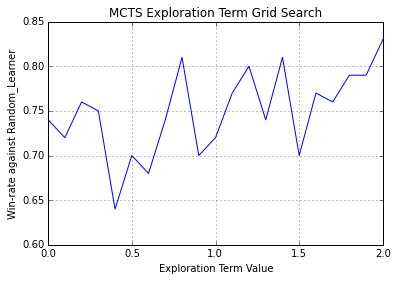

In [21]:
# Run Grid-Search
params, scores = select_MCTS_exploreterm()
plt.plot(params, scores)    
plt.title('MCTS Exploration Term Grid Search')
plt.xlabel('Exploration Term Value')
plt.ylabel('Win-rate against Random_Learner')
#plt.ylim(0,1)
plt.grid()

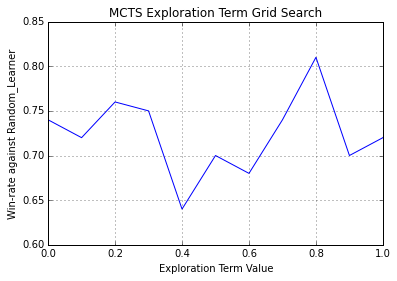

In [25]:
plt.plot(params, scores)    
plt.title('MCTS Exploration Term Grid Search')
plt.xlabel('Exploration Term Value')
plt.ylabel('Win-rate against Random_Learner')
plt.xlim(0,1)
plt.grid()
plt.savefig('MCTS_param.png', dpi=1000)

In [29]:
'''
Test
'''

x = ConnectN(5, 3)
p1 = Random_Learner(x) 
#p2 = MCTS(x, 100,0.5)
p2 = Extend_Learner(x, 4, 5, -1) 
#p2 = Random_Learner(x) 

%time p1_wins, p2_wins, draws = run_multiple_games(x, p1, p2, 100)
print(p1_wins, p2_wins, draws)

CPU times: user 255 ms, sys: 9.17 ms, total: 264 ms
Wall time: 263 ms
(20, 80, 0)


## Make Plots for Project

### Plotting Code

In [30]:
def run_multiple_games2(x, p1, p2, games, q=False):
    p1_wins = 0
    p2_wins = 0
    draws = 0
    history = []
    for i in xrange(0,games):
        x.reset()
        ret, winner = play_game_mod(x, p1, p2, q)
        history.append(winner)
        if winner == 1:
            p1_wins = p1_wins + 1
        if winner == -1:
            p2_wins = p2_wins + 1 
        if winner == 0:
            draws = draws + 1
        #print(winner)
    #print(p1_wins, p2_wins, draws)
    return p1_wins, p2_wins, draws, history

### Train Q-Learner